In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B

---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import userdata

In [ ]:
# Cargar los datos
ruta = userdata.get('ruta')
df = pd.read_csv(ruta + "ab_test-sales_pipeline-2.csv")
# Mostrar las primeras filas
print(data.head())

  test  conversion  no conversion
0    A           0              1
1    B           0              1
2    A           0              1
3    A           0              1
4    B           0              1


In [ ]:
# Calcular la tasa de conversión por grupo
conversion_rates = df.groupby('test')['conversion'].mean()
print("Tasa de conversión por grupo:")
print(conversion_rates)

Tasa de conversión por grupo:
test
A    0.119836
B    0.116404
Name: conversion, dtype: float64


In [ ]:
# a. Combinar los resultados de ambos grupos
conversions = df['conversion'].values
labels = df['test'].values

# Diferencia de la tasa de conversión original
original_diff = df[df['test'] == 'A']['conversion'].mean() - df[df['test'] == 'B']['conversion'].mean()

# c. & d. Realizar el test de permutación
n_permutations = 1000
perm_diffs = []

for _ in range(n_permutations):
    # b. Revolver los datos
    shuffled_labels = np.random.permutation(labels)
    # Crear nuevos grupos
    new_group_A = conversions[shuffled_labels == 'A']
    new_group_B = conversions[shuffled_labels == 'B']
    # Calcular la nueva diferencia de tasa de conversión
    perm_diffs.append(new_group_A.mean() - new_group_B.mean())

# Convertir a array para graficar
perm_diffs = np.array(perm_diffs)

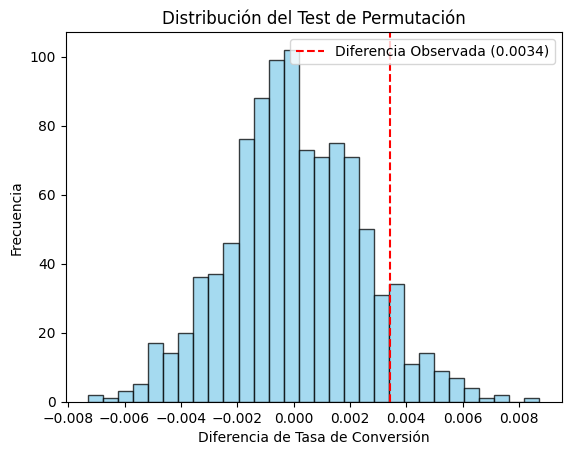

In [ ]:
# Graficar el histograma de las diferencias de permutación
plt.hist(perm_diffs, bins=30, alpha=0.75, color='skyblue', edgecolor='black')
plt.axvline(original_diff, color='red', linestyle='dashed', label=f'Diferencia Observada ({original_diff:.4f})')
plt.title("Distribución del Test de Permutación")
plt.xlabel("Diferencia de Tasa de Conversión")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
# Calcular el valor P
p_value = (np.sum(perm_diffs >= original_diff) + np.sum(perm_diffs <= -original_diff)) / n_permutations
print(f"Valor P: {p_value:.4f}")

# Evaluar significancia
alpha = 0.05
if p_value < alpha:
    print("La diferencia es estadísticamente significativa (rechazamos la hipótesis nula).")
else:
    print("La diferencia no es estadísticamente significativa (no rechazamos la hipótesis nula).")

Valor P: 0.1520
La diferencia no es estadísticamente significativa (no rechazamos la hipótesis nula).
